In [2]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid",rc={'figure.figsize':(15,8)})
sns.set(font_scale = 1.2)

In [3]:
data = pd.read_csv('data/aviacion/AviationData.csv', encoding='ISO-8859-1').drop_duplicates(subset = 'Event.Id').astype({'Investigation.Type':'category', 'Country':'category', 'Event.Date':'datetime64'})
data.dropna(subset=['Investigation.Type', 'LOCATION'], inplace=True)
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
19,2.02101E+13,Accident,ERA21LA121,2021-01-30,"KNOXVILLE, TN",United States,35.801686,-84.145919,NaN,NaN,...,Personal,Wdw Aviation Leasing Inc,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
65,2.02012E+13,Accident,CEN21LA101,2020-12-29,"ALEXANDRIA, MN",United States,45.865475,-95.394471,KAXN,Chandler Field-Alexandria Muni,...,NaN,"Bemidji Aviation Services, Inc.",0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
127,2.02011E+13,Accident,CEN21LA070,2020-11-30,"Franklin, AR",United States,36.178333,-91.771539,NaN,NaN,...,Inst,Apd Systems Llc,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
210,2.0201E+13,Accident,WPR21LA032,2020-10-31,"BILLINGS, MT",United States,45.812369,-108.520040,KBIL,Billings Logan International A,...,Personal,Donald C Nimmick,1.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980
85972,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
85973,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
85974,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84299 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                84299 non-null  object        
 1   Investigation.Type      84299 non-null  category      
 2   Accident.Number         84299 non-null  object        
 3   Event.Date              84299 non-null  datetime64[ns]
 4   LOCATION                84299 non-null  object        
 5   Country                 83804 non-null  category      
 6   Latitude                30815 non-null  float64       
 7   Longitude               30806 non-null  float64       
 8   Airport.Code            47522 non-null  object        
 9   Airport.Name            50184 non-null  object        
 10  Injury.Severity         84176 non-null  object        
 11  Aircraft.damage         81558 non-null  object        
 12  Aircraft.Category       28448 non-null  object

In [4]:
dataUSA = data.loc[data['Country'] == 'United States']
dataUSA

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
19,2.02101E+13,Accident,ERA21LA121,2021-01-30,"KNOXVILLE, TN",United States,35.801686,-84.145919,NaN,NaN,...,Personal,Wdw Aviation Leasing Inc,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
65,2.02012E+13,Accident,CEN21LA101,2020-12-29,"ALEXANDRIA, MN",United States,45.865475,-95.394471,KAXN,Chandler Field-Alexandria Muni,...,NaN,"Bemidji Aviation Services, Inc.",0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
127,2.02011E+13,Accident,CEN21LA070,2020-11-30,"Franklin, AR",United States,36.178333,-91.771539,NaN,NaN,...,Inst,Apd Systems Llc,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
210,2.0201E+13,Accident,WPR21LA032,2020-10-31,"BILLINGS, MT",United States,45.812369,-108.520040,KBIL,Billings Logan International A,...,Personal,Donald C Nimmick,1.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980
85972,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
85973,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
85974,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [5]:
dataUSA['LOCATION']

0         JANESVILLE, WI
19         KNOXVILLE, TN
65        ALEXANDRIA, MN
127         Franklin, AR
210         BILLINGS, MT
              ...       
85971         Canton, OH
85972         EUREKA, CA
85973      Saltville, VA
85974     BRIDGEPORT, CA
85975    MOOSE CREEK, ID
Name: LOCATION, Length: 78599, dtype: object

In [6]:
dataUSA['State'] = dataUSA['LOCATION'].apply(lambda loc : (str(loc).split(', ', 1)))
dataUSA = dataUSA.loc[dataUSA['State'].apply(lambda linea : len(linea) == 2 )]
dataUSA['State'] = dataUSA['State'].apply(lambda linea : linea[1] )
dataUSA = dataUSA.loc[dataUSA['Investigation.Type'] == 'Accident']
dataUSA

<ipython-input-6-9c7e58d3ed1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUSA['State'] = dataUSA['LOCATION'].apply(lambda loc : (str(loc).split(', ', 1)))
<ipython-input-6-9c7e58d3ed1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUSA['State'] = dataUSA['State'].apply(lambda linea : linea[1] )


,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN,WI
19,2.02101E+13,Accident,ERA21LA121,2021-01-30,"KNOXVILLE, TN",United States,35.801686,-84.145919,NaN,NaN,...,Wdw Aviation Leasing Inc,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,TN
65,2.02012E+13,Accident,CEN21LA101,2020-12-29,"ALEXANDRIA, MN",United States,45.865475,-95.394471,KAXN,Chandler Field-Alexandria Muni,...,"Bemidji Aviation Services, Inc.",0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,MN
127,2.02011E+13,Accident,CEN21LA070,2020-11-30,"Franklin, AR",United States,36.178333,-91.771539,NaN,NaN,...,Apd Systems Llc,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN,AR
210,2.0201E+13,Accident,WPR21LA032,2020-10-31,"BILLINGS, MT",United States,45.812369,-108.520040,KBIL,Billings Logan International A,...,Donald C Nimmick,1.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN,MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980,OH
85972,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA
85973,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
85974,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA


In [7]:
top10 = dataUSA['State'].value_counts()
top10

CA            8324
TX            5447
AK            5304
FL            5280
AZ            2664
              ... 
LA, GM           1
MANU'A, HI       1
NYC, NY          1
CO, CO           1
Oahu, HI         1
Name: State, Length: 71, dtype: int64

In [8]:
states = pd.read_csv('data/aviacion/USState_Codes.csv')
states

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [9]:
states = states.join(top10, on='Abbreviation', how='right')
states = states.rename(columns={'State':'CantidadAccidentes'})
states

,US_State,Abbreviation,CantidadAccidentes
4.0,California,CA,8324
42.0,Texas,TX,5447
1.0,Alaska,AK,5304
8.0,Florida,FL,5280
2.0,Arizona,AZ,2664
...,...,...,...
NaN,NaN,"LA, GM",1
NaN,NaN,"MANU'A, HI",1
NaN,NaN,"NYC, NY",1
NaN,NaN,"CO, CO",1


In [12]:
states = states.loc[states['CantidadAccidentes'] > 104] # dejo afuera algunos que no son de EEUU (error del dataset je)
states

,US_State,Abbreviation,CantidadAccidentes
4.0,California,CA,8324
42.0,Texas,TX,5447
1.0,Alaska,AK,5304
8.0,Florida,FL,5280
2.0,Arizona,AZ,2664
5.0,Colorado,CO,2466
46.0,Washington,WA,2434
21.0,Michigan,MI,1923
9.0,Georgia,GA,1824
12.0,Illinois,IL,1797


(1982.0, 2024.65)

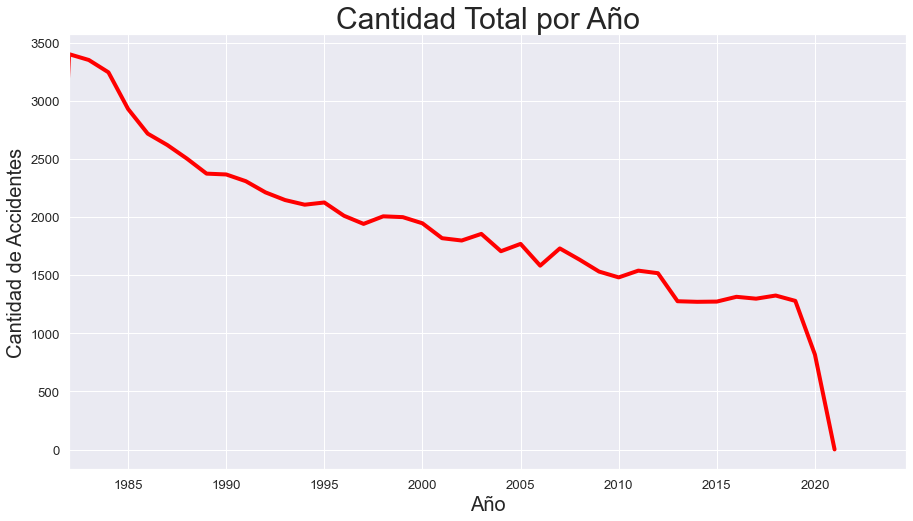

In [24]:
accFL = dataUSA.loc[dataUSA['State'].apply(lambda x : x in set(states['Abbreviation']))]['Event.Date'].apply(lambda date : date.year).value_counts()
accFL = accFL.rename('CantidadAccidentes')

plotFL = sns.lineplot( data=accFL, color='red', linewidth = 4)
plotFL.set_ylabel('Cantidad de Accidentes', size=20)
plotFL.set_xlabel('Año', size=20)
plotFL.set_title('Cantidad Total por Año', size=30)
plotFL.set_xlim(left=1982)